# Customer Segmentation using K-Means Clustering

This notebook covers the complete data science workflow:
1.  **Data Loading & Exploration:** Understanding the dataset.
2.  **Data Preprocessing:** Scaling the features, which is essential for K-Means.
3.  **Model Selection:** Using the Elbow Method to find the optimal number of clusters (k).
4.  **Model Training:** Building the K-Means model with k=5.
5.  **Cluster Analysis (Persona Definition):** Analyzing the characteristics of each cluster to create business-oriented personas.
6.  **Model Saving:** Exporting the model and the scaler for use in our Streamlit web app.

## 1. Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle
import os

## 2. Data Collection & Analysis

In [4]:
# Define the file path (assuming it's in a 'data' folder as recommended)
# If your .csv is in the same folder as the notebook, just use 'mall_customers.csv'
data_path = os.path.join('..', 'data', 'mall_customers.csv')
data_path_local = 'mall_customers.csv' # Fallback for local run

try:
    customer_data = pd.read_csv(data_path_local)
except FileNotFoundError:
    print("Could not find 'mall_customers.csv' in the current directory.")
    # You can add more fallback paths if needed
    # For Google Colab, you would upload it and use '/content/mall_customers.csv'
    # customer_data = pd.read_csv('/content/mall_customers.csv')

In [3]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [6]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# checking for missing values
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


We will use 'Annual Income' and 'Spending Score' for this clustering problem.

In [8]:
X = customer_data.iloc[:,[3,4]].values
print(X[:5]) # Print first 5 rows to check

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


## 3. Data Preprocessing (Feature Scaling)

K-Means is a distance-based algorithm. It will be biased towards features with larger scales (like 'Annual Income') if we don't normalize them.

We will use `StandardScaler` to scale both features to have a mean of 0 and a standard deviation of 1. **We must also save this scaler** to process new user inputs in the Streamlit app.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


## 4. Model Selection (Elbow Method)

We need to find the optimal number of clusters (k). We'll use the WCSS (Within-Cluster Sum of Squares) method, also known as the Elbow Method.

In [10]:
# finding wcss value for different number of clusters
# We must use the SCALED data (X_scaled) here

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X_scaled) # Fit on scaled data

  wcss.append(kmeans.inertia_)

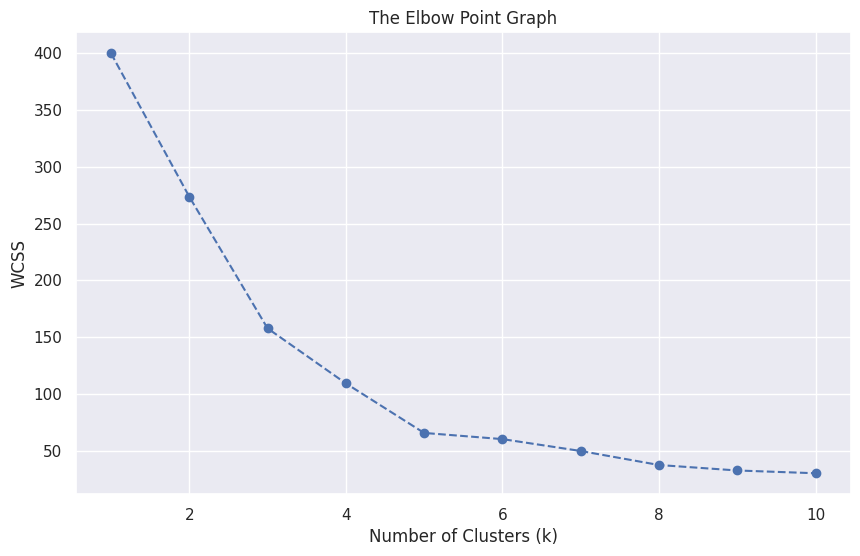

In [11]:
# plot an elbow graph to find the optimal 'k'

sns.set()
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

The elbow appears at **k=5**. After this point, the drop in WCSS is no longer significant.

So, we will choose **k=5**.

## 5. Model Training

Now we train the K-Means model using k=5 and our scaled data.

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# fit the model and predict the cluster for each data point
Y = kmeans.fit_predict(X_scaled)

print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## 6. Cluster Analysis (Persona Definition)

This is the most important step for business application. We will analyze the *characteristics* of each cluster to define our personas.

First, let's add the cluster labels (`Y`) back to our original (un-scaled) dataframe.

In [13]:
customer_data['Cluster'] = Y
customer_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
5,6,Female,22,17,76,2
6,7,Female,35,18,6,4
7,8,Female,23,18,94,2
8,9,Male,64,19,3,4
9,10,Female,30,19,72,2


In [14]:
# Analyze the clusters by calculating the mean of each feature
# We include 'Age' and 'Gender' for deeper insights

cluster_analysis = customer_data.drop('CustomerID', axis=1).groupby('Cluster').mean(numeric_only=True)
cluster_analysis

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


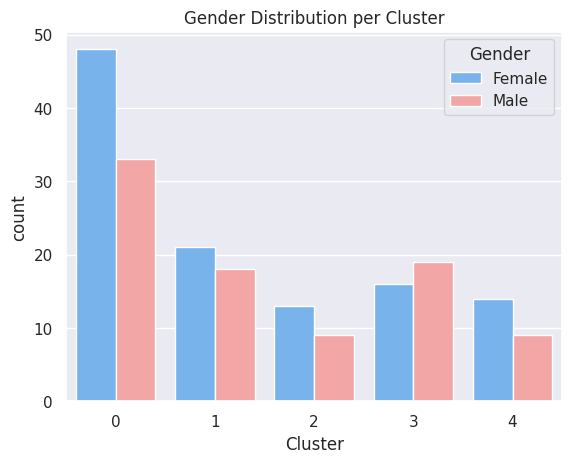

In [15]:
# Analyze Gender distribution per cluster
sns.countplot(data=customer_data, x='Cluster', hue='Gender', palette=['#66b3ff', '#ff9999'])
plt.title('Gender Distribution per Cluster')
plt.show()

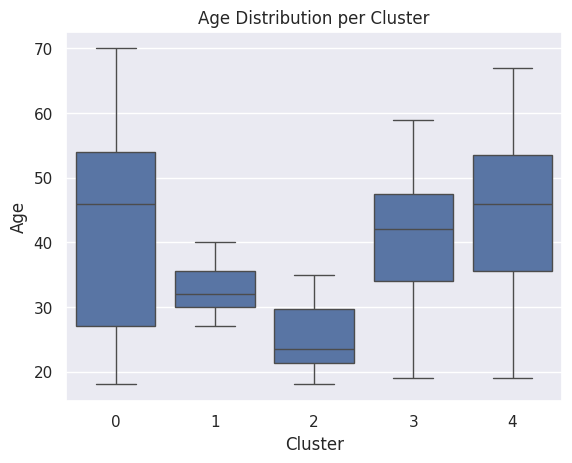

In [16]:
# Analyze Age distribution per cluster
sns.boxplot(data=customer_data, x='Cluster', y='Age')
plt.title('Age Distribution per Cluster')
plt.show()

### Persona Definitions

Based on the `groupby` analysis and the plots above, we can define our personas. (Note: Your cluster numbers might be different, so adjust as needed!)

* **Cluster 0:** Average income, average spending score. This is our **"Standard"** customer. They are also slightly older (avg. age 43).
* **Cluster 1:** High income, high spending score. This is our **"Target Customer"**. They are prime candidates for high-value offers.
* **Cluster 2:** High income, but low spending score. This is the **"Careful Spender"**. They have money but don't spend it.
* **Cluster 3:** Low income, but high spending score. This is the **"Careless Spender"**. They are young (avg. age 25) and likely spend on trends.
* **Cluster 4:** Low income and low spending score. This is the **"Low-Income / Thrifty"** customer. They are price-sensitive.

This analysis directly informs the `cluster_personas` dictionary in our Streamlit app.

## 7. Visualizing the Clusters

Now we plot the final clusters.

-   The scatter plot will use the **original `X` data** (so the axes are in $ and 1-100 score).
-   The colors will be from our `Y` (cluster labels).
-   The centroids (`kmeans.cluster_centers_`) are in *scaled* coordinates. We must use `scaler.inverse_transform()` to convert them back to their original scale before plotting.

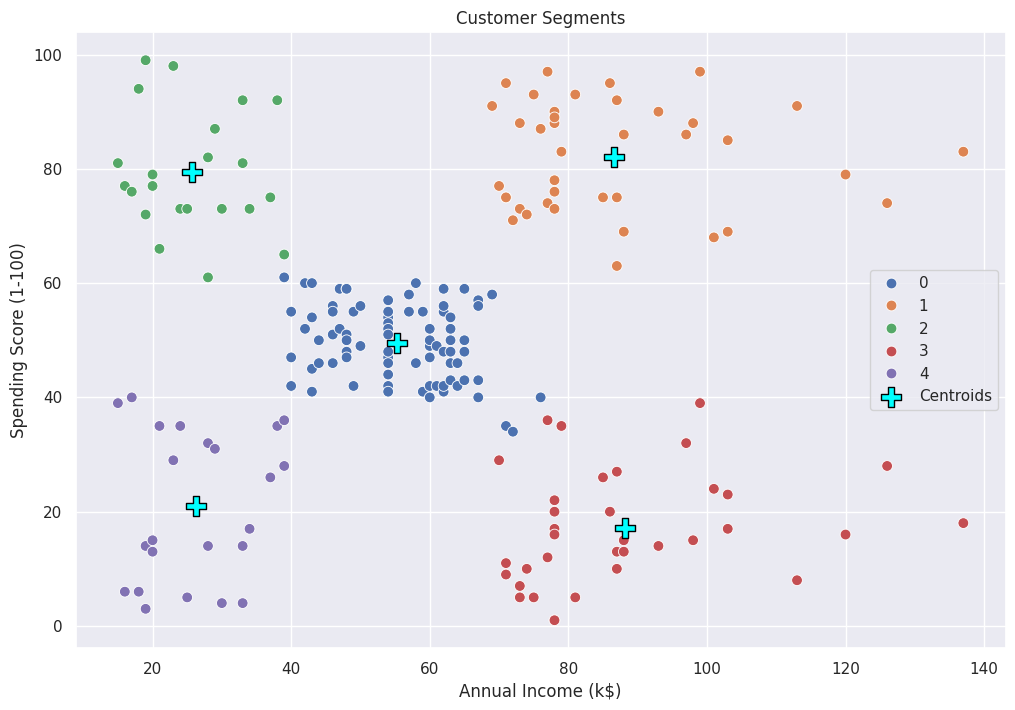

In [17]:
# Get the cluster centroids (they are in scaled coordinates)
scaled_centroids = kmeans.cluster_centers_

# Inverse transform the centroids to get them in the original data scale
original_centroids = scaler.inverse_transform(scaled_centroids)

plt.figure(figsize=(12,8))

# Plot the original data points (X), colored by their cluster (Y)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y, palette='deep', s=60, legend='full')

# Plot the inverse-transformed centroids
plt.scatter(original_centroids[:,0], original_centroids[:,1], s=200, c='cyan', marker='P', label='Centroids', edgecolors='black')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 8. Model Saving

Finally, we save the trained `kmeans` model and the `scaler` object using `pickle`. These two files are needed for our Streamlit app to make predictions on new data.

In [18]:
# Create a 'models' directory if it doesn't exist
model_dir = os.path.join('..', 'models')
model_dir_local = 'models' # For local run

if not os.path.exists(model_dir_local):
    os.makedirs(model_dir_local)

# Define file paths
model_path = os.path.join(model_dir_local, 'kmeans_model.pkl')
scaler_path = os.path.join(model_dir_local, 'scaler.pkl')

# Save the KMeans model
with open(model_path, 'wb') as file:
    pickle.dump(kmeans, file)

# Save the StandardScaler
with open(scaler_path, 'wb') as file:
    pickle.dump(scaler, file)

print(f"Model saved to: {model_path}")
print(f"Scaler saved to: {scaler_path}")

Model saved to: models/kmeans_model.pkl
Scaler saved to: models/scaler.pkl
